<a href="https://colab.research.google.com/github/DarkPhe0niX/AIML_GRIND/blob/main/Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
data = {
    "Size (sq ft)": [600, 800, 1000, 1200, 1500, 1800, 2000, 2500],
    "Price ($)": [150000, 200000, 250000, 280000, 320000, 400000, 450000, 500000]
}

df = pd.DataFrame(data)
print(df)


   Size (sq ft)  Price ($)
0           600     150000
1           800     200000
2          1000     250000
3          1200     280000
4          1500     320000
5          1800     400000
6          2000     450000
7          2500     500000


In [50]:
X = df[["Size (sq ft)"]]  # Features (House size)
y = df["Price ($)"]  # Target (House price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

# Compare actual vs predicted values
print(pd.DataFrame({"Actual": y_test, "Predicted": y_pred}))


   Actual      Predicted
1  200000  200766.016713
5  400000  387116.991643


Mean Squared Error: 83279342.95978427


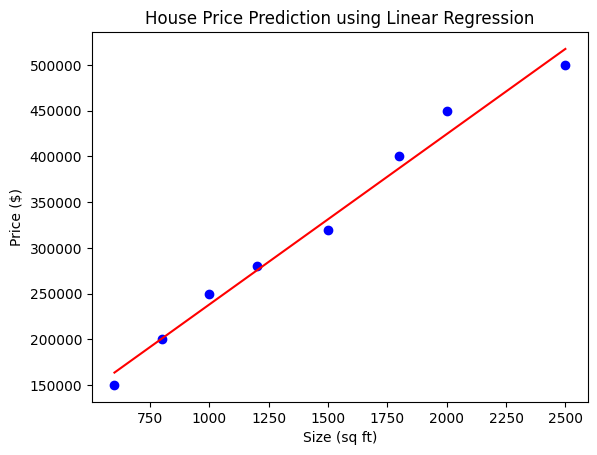

In [53]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizing the Regression Line
plt.scatter(X, y, color="blue")
plt.plot(X, model.predict(X), color="red")  # Regression line
plt.xlabel("Size (sq ft)")
plt.ylabel("Price ($)")
plt.title("House Price Prediction using Linear Regression")
plt.show()

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Root Mean Squared Error (manually computed)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
print(f"Root Mean Squared Error: {rmse:.2f}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 6824.51
Mean Squared Error: 83279342.96
Root Mean Squared Error: 9125.75
R² Score: 0.99


### Logistic Regression

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
data = {
    "Study Hours": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Pass Exam": [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]  # 1 = Pass, 0 = Fail
}

df = pd.DataFrame(data)
print(df)


   Study Hours  Pass Exam
0            1          0
1            2          0
2            3          0
3            4          0
4            5          1
5            6          1
6            7          1
7            8          1
8            9          1
9           10          1


In [57]:
X = df[["Study Hours"]]  # Input (Feature)
y = df["Pass Exam"]  # Output (Label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [1 0]


In [60]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 100.00%
Confusion Matrix:
 [[1 0]
 [0 1]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


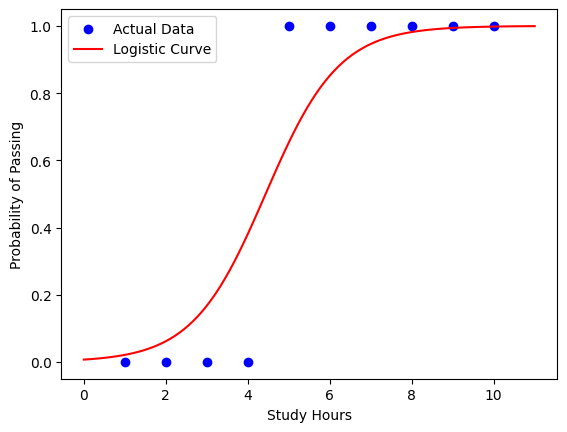

In [61]:
# Generate values for plotting
X_range = np.linspace(0, 11, 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]  # Probability of passing

plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X_range, y_prob, color="red", label="Logistic Curve")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.legend()
plt.show()

### Decision Tree

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [63]:
data = {
    "Age": [22, 25, 47, 52, 46, 56, 55, 60, 62, 61],
    "Salary": [20000, 25000, 50000, 55000, 52000, 60000, 58000, 62000, 63000, 64000],
    "Buys Product": [0, 0, 1, 1, 1, 1, 1, 0, 0, 0]  # 1 = Yes, 0 = No
}

df = pd.DataFrame(data)
print(df)


   Age  Salary  Buys Product
0   22   20000             0
1   25   25000             0
2   47   50000             1
3   52   55000             1
4   46   52000             1
5   56   60000             1
6   55   58000             1
7   60   62000             0
8   62   63000             0
9   61   64000             0


In [64]:
X = df[["Age", "Salary"]]  # Input Features
y = df["Buys Product"]  # Output Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [66]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred)

Predictions: [0 0]


In [67]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 100.00%
Confusion Matrix:
 [[2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


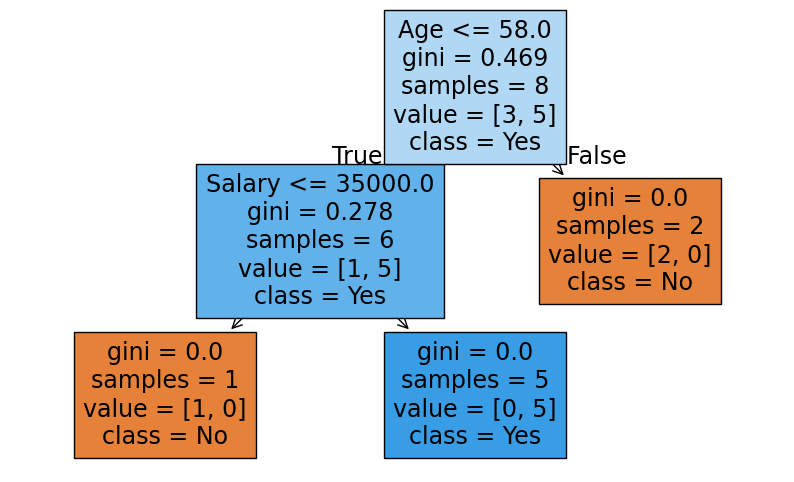

In [68]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=["Age", "Salary"], class_names=["No", "Yes"], filled=True)
plt.show()